In [2]:
import pandas
import numpy

#Import the data from the .csv file
dataset = pandas.read_csv('snow_obj.csv', delimiter="\t")

#Let's have a look at the data
dataset.head()

,size,roughness,color,motion,label
0,50.959361,1.318226,green,0.054290,tree
1,60.008521,0.554291,brown,0.000000,tree
2,20.530772,1.097752,white,1.380464,tree
3,28.092138,0.966482,grey,0.650528,tree
4,48.344211,0.799093,grey,0.000000,tree


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Add a new label with true/false values to our dataset
dataset["is_hiker"] = dataset.label == "hiker"

# Split the dataset in an 70/30 train/test ratio. 
train, test = train_test_split(dataset, test_size=0.3, random_state=1, shuffle=True)

# define a random forest model
model = RandomForestClassifier(n_estimators=1, random_state=1, verbose=False)

# Define which features are to be used 
features = ["size", "roughness", "motion"]

# Train the model using the binary label
model.fit(train[features], train.is_hiker)

print("Model trained!")

Model trained!


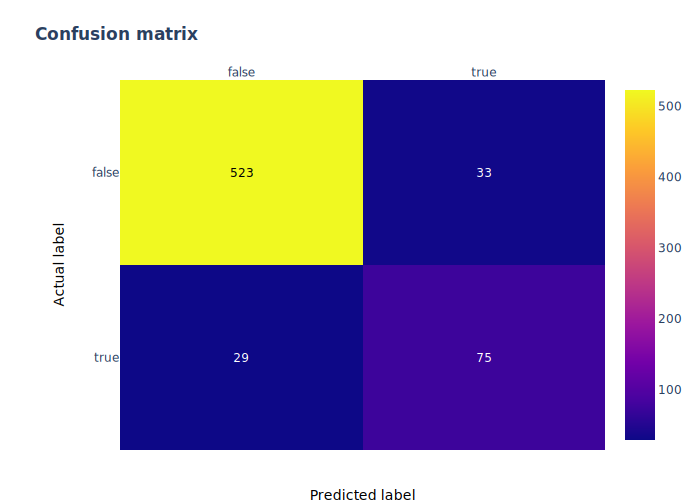

In [5]:
# sklearn has a very convenient utility to build confusion matrices
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "svg"

# Calculate the model's accuracy on the TEST set
actual = test.is_hiker
predictions = model.predict(test[features])

# Build and print our confusion matrix, using the actual values and predictions 
# from the test set, calculated in previous cells
cm = confusion_matrix(actual, predictions, normalize=None)

# Create the list of unique labels in the test set, to use in our plot
# I.e., ['True', 'False',]
unique_targets = sorted(list(test["is_hiker"].unique()))

# Convert values to lower case so the plot code can count the outcomes
x = y = [str(s).lower() for s in unique_targets]

# Plot the matrix above as a heatmap with annotations (values) in its cells
fig = ff.create_annotated_heatmap(cm, x, y)

# Set titles and ordering
fig.update_layout(  title_text="<b>Confusion matrix</b>", 
                    yaxis = dict(categoryorder = "category descending"))

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted label",
                        xref="paper",
                        yref="paper"))

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.15,
                        y=0.5,
                        showarrow=False,
                        text="Actual label",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# We need margins so the titles fit
fig.update_layout(margin=dict(t=80, r=20, l=120, b=50))
fig['data'][0]['showscale'] = True
fig.show()

In [6]:
# Let's also calculate some values that will be used throughout this exercise
# We already have actual values and corresponding predictions, defined above
correct = actual == predictions
tp = numpy.sum(correct & actual)
tn = numpy.sum(correct & numpy.logical_not(actual))
fp = numpy.sum(numpy.logical_not(correct) & actual)
fn = numpy.sum(numpy.logical_not(correct) & numpy.logical_not(actual))

print("TP - True Positives: ", tp)
print("TN - True Negatives: ", tn)
print("FP - False positives: ", fp)
print("FN - False negatives: ", fn)

TP - True Positives:  75
TN - True Negatives:  523
FP - False positives:  29
FN - False negatives:  33


We can use the values and matrix above to help us understand other metrics.


## Calculating metrics

From here on we will take a closer look at each at the following metrics, how they are calculated and how they can help explain our current model. 

* Accuracy
* Sensitivity/Recall
* Specificity
* Precision
* False positive rate

Let's first recall some useful terms:

* TP = True positives: a positive label is correctly predicted
* TN = True negatives: a negative label is correctly predicted
* FP = False positives: a negative label is predicted as a positive
* FN = False negatives: a positive label is predicted as a negative


### Accuracy
Accuracy is the number of correct predictions divided by the total number of predictions:

```
    accuracy = (TP+TN) / number of samples
```

It's possibly the most basic metric used but, as we've seen, it's not the most reliable when *imbalanced datasets* are used.

In code:

In [7]:
# Calculate accuracy
# len(actual) is the number of samples in the set that generated TP and TN
accuracy = (tp+tn) / len(actual) 

# print result as a percentage
print(f"Model accuracy is {accuracy:.2f}%")

Model accuracy is 0.91%


### Sensitivity/Recall

*Sensitivity* and *Recall* are interchangeable names for the same metric, which expresses the fraction of samples __correctly__ predicted by a model:


```
    sensitivity = recall = TP / (TP + FN)
```

This is an important metric, that tells us how out of all the *actually* __positive__ samples, how many are __correctly__ predicted as positive.

In code:

In [8]:
# code for sensitivity/recall
sensitivity = recall = tp / (tp + fn)

# print result as a percentage
print(f"Model sensitivity/recall is {sensitivity:.2f}%")

Model sensitivity/recall is 0.69%


### Specificity
Specificity expresses the fraction of __negative__ labels correctly predicted over the total number of existing negative samples:

```
    specificity = TN / (TN + FP)
```

Tells us how out of all the *actually* __negative__ samples, how many are __correctly__ predicted as negative

It can be calculated using the following code:

In [9]:
# Code for specificity
specificity = tn / (tn + fp)

# print result as a percentage
print(f"Model specificity is {specificity:.2f}%")

Model specificity is 0.95%


### Precision
Precision expresses the proportion of __correctly__ predicted positive samples over all positive predictions:

```
    precision = TP / (TP + FP)
```
In other words, it indicates how out of all positive predictions, how many are truly positive labels.

It can be calculated using the following code:

In [10]:
# Code for precision

precision = tp / (tp + fp)

# print result as a percentage
print(f"Model precision is {precision:.2f}%")

Model precision is 0.72%


### False positive rate
False positive rate or FPR, is the number of __incorrect__ positive predictions divided by the total number of negative samples:

```
    false_positive_rate = FP / (FP + TN)
```

Out of all the actual negatives, how many were misclassified as positives?

In code:

In [11]:
# Code for false positive rate
false_positive_rate = fp / (fp + tn)

# print result as a percentage
print(f"Model false positive rate is {false_positive_rate:.2f}%")


Model false positive rate is 0.05%


Notice that the sum of `specificity` and `false positive rate` should always be equal to `1`.

## Conclusion

There are several different metrics that can help us evaluate the performance of a model, in the context of the quality of its predictions.

The choice of the most adequate metrics, however, is primarily a funciton of the data and the problem we are trying to solve.